In [101]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import scipy
df = pd.read_csv('/Users/cappsjr/Downloads/price.csv')
df_1 = pd.read_csv('/Users/cappsjr/Downloads/pricepersqft.csv')

In [98]:
rent_jan = df.ix[0:, 'January 2017']
jan_mean = rent_jan.mean()
print("Jan. 2017 Mean Rental Price: ", rent_jan.mean())
jan_std = rent_jan.std()
print("Jan. 2017 Rental Price Standard Deviation: ", rent_jan.std())
jan_median = np.median(df['January 2017'])
print("Jan. 2017 Median Rental Price: ", jan_median)

print(None)

ppsf_jan = df_1.ix[0:, 'January 2017']
jan_mean_ppsf = ppsf_jan.mean()
print("Jan. 2017 Mean Price per Square Foot: ", ppsf_jan.mean())
jan_std_ppsf = ppsf_jan.std()
print("Jan. 2017 Price per Square Foot Standard Deviation: ", ppsf_jan.std())
jan_median_ppsf = np.median(df_1['January 2017'])
print("Jan. 2017 Median Price per Square Foot: ", jan_median_ppsf)

Jan. 2017 Mean Rental Price:  1467.29655015
Jan. 2017 Rental Price Standard Deviation:  820.707578969
Jan. 2017 Median Rental Price:  1264.0
None
Jan. 2017 Mean Price per Square Foot:  0.964355902341
Jan. 2017 Price per Square Foot Standard Deviation:  0.381297057516
Jan. 2017 Median Price per Square Foot:  0.872


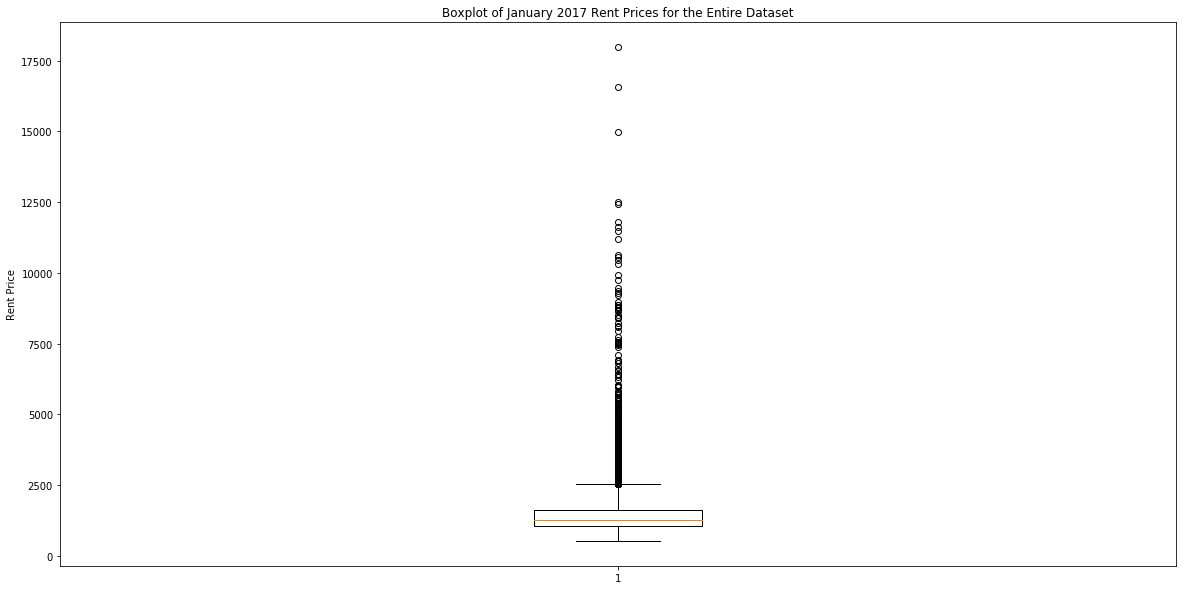

In [73]:
plt.figure(figsize = (20, 10))
plt.boxplot(df['January 2017'])
plt.title('Boxplot of January 2017 Rent Prices for the Entire Dataset')
plt.ylabel('Rent Price')
plt.show()

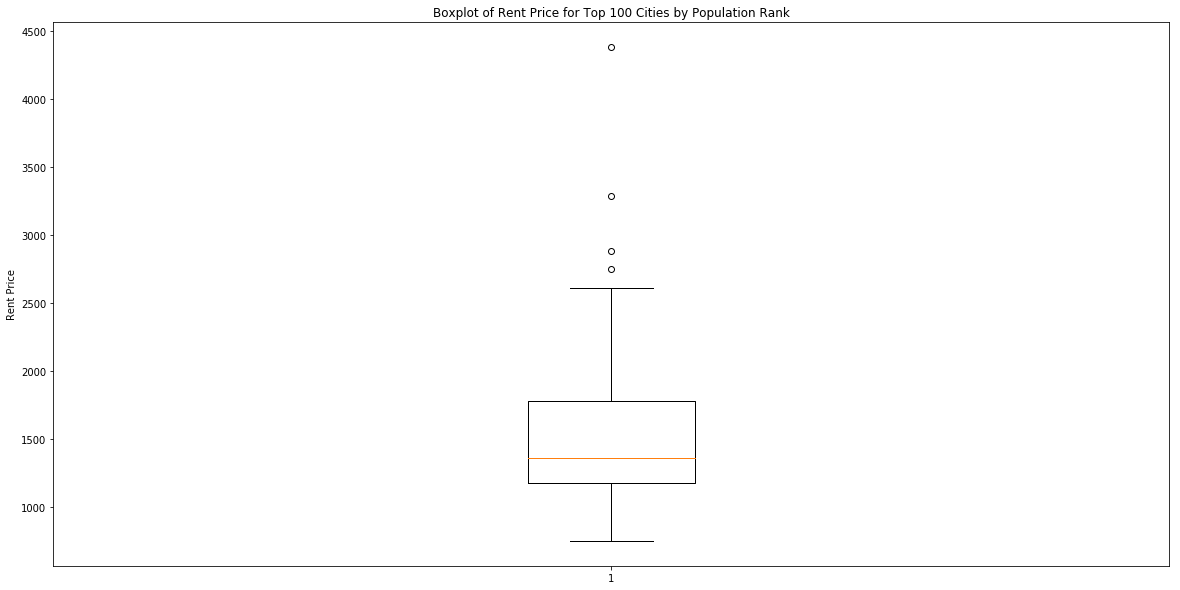

In [74]:
plt.figure(figsize = (20, 10))
plt.boxplot(top_100_rent_jan)
plt.title('Boxplot of Rent Price for Top 100 Cities by Population Rank')
plt.ylabel('Rent Price')
plt.show()

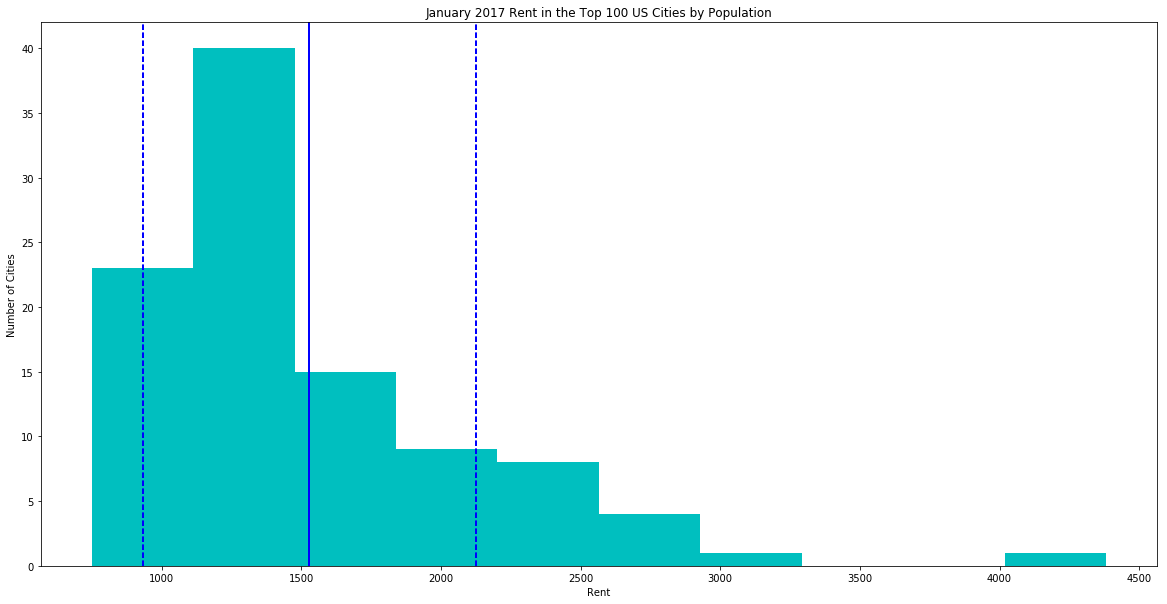

Mean:  1529.31683168
Standard Deviation:  597.169070376


In [66]:
top_100_rent_jan = df.ix[0: 100, 'January 2017']
plt.figure(figsize = (20, 10))
plt.hist(top_100_rent_jan, color = 'c')
plt.axvline(top_100_rent_jan.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(top_100_rent_jan.mean() - top_100_rent_jan.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.axvline(top_100_rent_jan.mean() + top_100_rent_jan.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.ylabel("Number of Cities")
plt.xlabel("Rent")
plt.title("January 2017 Rent in the Top 100 US Cities by Population")
plt.show()
print("Mean: ", top_100_rent_jan.mean())
print("Standard Deviation: ", top_100_rent_jan.std())

In [6]:
rent_price = pd.melt(df, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'])
rent_price.dropna(inplace = True)
highest_rent = rent_price[rent_price['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=False) \
                .head(10)
print(highest_rent)

        City Code            City                  Metro       County State  \
983928     124901  Jupiter Island         Port St. Lucie       Martin    FL   
976845      30280        Atherton          San Francisco    San Mateo    CA   
984474       4721   Fisher Island  Miami-Fort Lauderdale   Miami-Dade    FL   
982746      38980    Hidden Hills            Los Angeles  Los Angeles    CA   
981947       6822   Rolling Hills            Los Angeles  Los Angeles    CA   
975541      55743    Hillsborough          San Francisco    San Mateo    CA   
981183      10348       Belvedere          San Francisco        Marin    CA   
984046      27005      Sea Island              Brunswick        Glynn    GA   
980130       7882        Westlake      Dallas-Fort Worth      Tarrant    TX   
978745      16583  Portola Valley          San Francisco    San Mateo    CA   

        Population Rank      variable    value  
983928            12235  January 2017  17985.0  
976845             5152  January

In [7]:
lowest_rent = rent_price[rent_price['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=True) \
                .head(10)
print(lowest_rent)

        City Code                City          Metro      County State  \
975777     166526             Beecher          Flint     Genesee    MI   
971917     398007               Flint          Flint     Genesee    MI   
981797      26010        Mount Morris          Flint     Genesee    MI   
972307      28060          Youngstown     Youngstown    Mahoning    OH   
979887     396601  West End-Cobb Town       Anniston     Calhoun    AL   
982893       4416              Drexel         Dayton  Montgomery    OH   
976549      37722            Campbell     Youngstown    Mahoning    OH   
973150      27771              Warren     Youngstown    Trumbull    OH   
978729      15206             Electra  Wichita Falls     Wichita    TX   
972471      34103         Springfield    Springfield       Clark    OH   

        Population Rank      variable  value  
975777             4084  January 2017  518.0  
971917              224  January 2017  549.0  
981797            10104  January 2017  555.0

In [8]:
price_psf = pd.melt(df_1, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'])
price_psf.dropna(inplace = True)
highest_ppsf = price_psf[price_psf['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=False) \
                .head(10)
print(highest_ppsf)

        City Code            City                  Metro       County State  \
893633       4721   Fisher Island  Miami-Fort Lauderdale   Miami-Dade    FL   
893897      49856   Stinson Beach          San Francisco        Marin    CA   
887038      30280        Atherton          San Francisco    San Mateo    CA   
893164     124901  Jupiter Island         Port St. Lucie       Martin    FL   
890903      10348       Belvedere          San Francisco        Marin    CA   
885289      12520          Malibu            Los Angeles  Los Angeles    CA   
884292      52842    Laguna Beach            Los Angeles       Orange    CA   
893193       3734     Boca Grande             Fort Myers          Lee    FL   
889171       8185         Del Mar              San Diego    San Diego    CA   
883338      10389   Beverly Hills            Los Angeles  Los Angeles    CA   

        Population Rank      variable  value  
893633            11628  January 2017  6.406  
893897            11892  January 201

In [9]:
lowest_ppsf = price_psf[price_psf['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=True) \
                .head(10)
print(lowest_ppsf)

        City Code          City         Metro    County State  \
886318      28546         Elkin    Mount Airy     Surry    NC   
886767      17792        Dobson    Mount Airy     Surry    NC   
891024       7246    State Road    Mount Airy     Surry    NC   
884178      12936    New Castle    New Castle  Lawrence    PA   
884569      30398         Belen   Albuquerque  Valencia    NM   
883313      12852    Mount Airy    Mount Airy     Surry    NC   
890316      23777  Bosque Farms   Albuquerque  Valencia    NM   
883481       9768  Marshalltown  Marshalltown  Marshall    IA   
882231     398007         Flint         Flint   Genesee    MI   
893643      47061       Peralta   Albuquerque  Valencia    NM   

        Population Rank      variable  value  
886318             4313  January 2017  0.378  
886767             4762  January 2017  0.394  
891024             9019  January 2017  0.406  
884178             2173  January 2017  0.406  
884569             2564  January 2017  0.412  
88

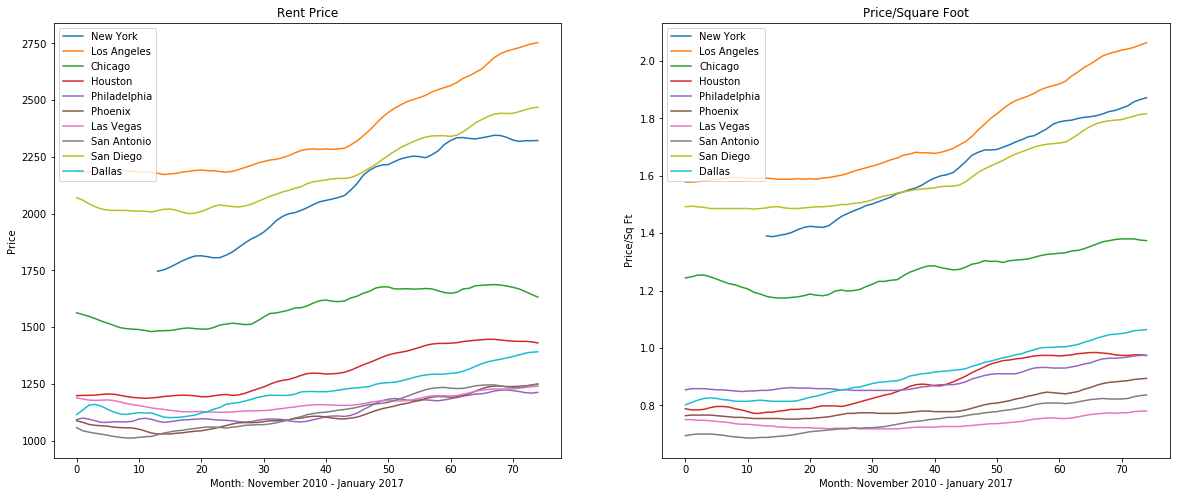

November 2010 - January 2017 Mean Rent
New York:  2089.64516129
Los Angeles:  2355.29333333
Chicago:  1587.38666667
Houston:  1300.54666667
Philadelphia:  1129.98666667
Phoenix:  1118.04
Las Vegas:  1168.49333333
San Antonio:  1123.68
San Diego:  2172.84
Dallas:  1218.14666667
None
November 2010 - January 2017 Mean Price per Square Foot
New York:  1.62570967742
Los Angeles:  1.73941333333
Chicago:  1.26762666667
Houston:  0.87376
Philadelphia:  0.88784
Phoenix:  0.796906666667
Las Vegas:  0.738506666667
San Antonio:  0.7504
San Diego:  1.59304
Dallas:  0.91248


In [12]:
NY_rent = df.ix[0, 'November 2010':]
LA_rent = df.ix[1, 'November 2010':]
Chi_rent = df.ix[2, 'November 2010':]
Hou_rent = df.ix[3, 'November 2010':]
Phi_rent = df.ix[4, 'November 2010':]
Phx_rent = df.ix[5, 'November 2010':]
LV_rent = df.ix[6, 'November 2010':]
SA_rent = df.ix[7, 'November 2010':]
SD_rent = df.ix[8, 'November 2010':]
Dal_rent = df.ix[9, 'November 2010':]

NY_ppsf = df_1.ix[0, 'November 2010':]
LA_ppsf = df_1.ix[1, 'November 2010':]
Chi_ppsf = df_1.ix[2, 'November 2010':]
Hou_ppsf = df_1.ix[3, 'November 2010':]
Phi_ppsf = df_1.ix[4, 'November 2010':]
Phx_ppsf = df_1.ix[5, 'November 2010':]
LV_ppsf = df_1.ix[6, 'November 2010':]
SA_ppsf = df_1.ix[7, 'November 2010':]
SD_ppsf = df_1.ix[8, 'November 2010':]
Dal_ppsf = df_1.ix[9, 'November 2010':]

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(NY_rent.values, label = "New York")
plt.plot(LA_rent.values, label = "Los Angeles")
plt.plot(Chi_rent.values, label = "Chicago")
plt.plot(Hou_rent.values, label = "Houston")
plt.plot(Phi_rent.values, label = "Philadelphia")
plt.plot(Phx_rent.values, label = "Phoenix")
plt.plot(LV_rent.values, label = "Las Vegas")
plt.plot(SA_rent.values, label = "San Antonio")
plt.plot(SD_rent.values, label = "San Diego")
plt.plot(Dal_rent.values, label = "Dallas")
plt.legend(loc = 'upper left')
plt.ylabel('Price')
plt.xlabel('Month: November 2010 - January 2017')
plt.title('Rent Price')

plt.subplot(1, 2, 2)
plt.plot(NY_ppsf.values, label = "New York")
plt.plot(LA_ppsf.values, label = "Los Angeles")
plt.plot(Chi_ppsf.values, label = "Chicago")
plt.plot(Hou_ppsf.values, label = "Houston")
plt.plot(Phi_ppsf.values, label = "Philadelphia")
plt.plot(Phx_ppsf.values, label = "Phoenix")
plt.plot(LV_ppsf.values, label = "Las Vegas")
plt.plot(SA_ppsf.values, label = "San Antonio")
plt.plot(SD_ppsf.values, label = "San Diego")
plt.plot(Dal_ppsf.values, label = "Dallas")
plt.legend(loc = 'upper left')
plt.ylabel('Price/Sq Ft')
plt.xlabel('Month: November 2010 - January 2017')
plt.title('Price/Square Foot')
plt.show()

""""""

print("November 2010 - January 2017 Mean Rent")
print("New York: ", df.ix[0, 'November 2010':].mean())
print("Los Angeles: ", df.ix[1, 'November 2010':].mean())
print("Chicago: ", df.ix[2, 'November 2010':].mean())
print("Houston: ", df.ix[3, 'November 2010':].mean())
print("Philadelphia: ", df.ix[4, 'November 2010':].mean())
print("Phoenix: ", df.ix[5, 'November 2010':].mean())
print("Las Vegas: ", df.ix[6, 'November 2010':].mean())
print("San Antonio: ", df.ix[7, 'November 2010':].mean())
print("San Diego: ", df.ix[8, 'November 2010':].mean())
print("Dallas: ", df.ix[9, 'November 2010':].mean())
print(None)
print("November 2010 - January 2017 Mean Price per Square Foot")
print("New York: ", df_1.ix[0, 'November 2010':].mean())
print("Los Angeles: ", df_1.ix[1, 'November 2010':].mean())
print("Chicago: ", df_1.ix[2, 'November 2010':].mean())
print("Houston: ", df_1.ix[3, 'November 2010':].mean())
print("Philadelphia: ", df_1.ix[4, 'November 2010':].mean())
print("Phoenix: ", df_1.ix[5, 'November 2010':].mean())
print("Las Vegas: ", df_1.ix[6, 'November 2010':].mean())
print("San Antonio: ", df_1.ix[7, 'November 2010':].mean())
print("San Diego: ", df_1.ix[8, 'November 2010':].mean())
print("Dallas: ", df_1.ix[9, 'November 2010':].mean())

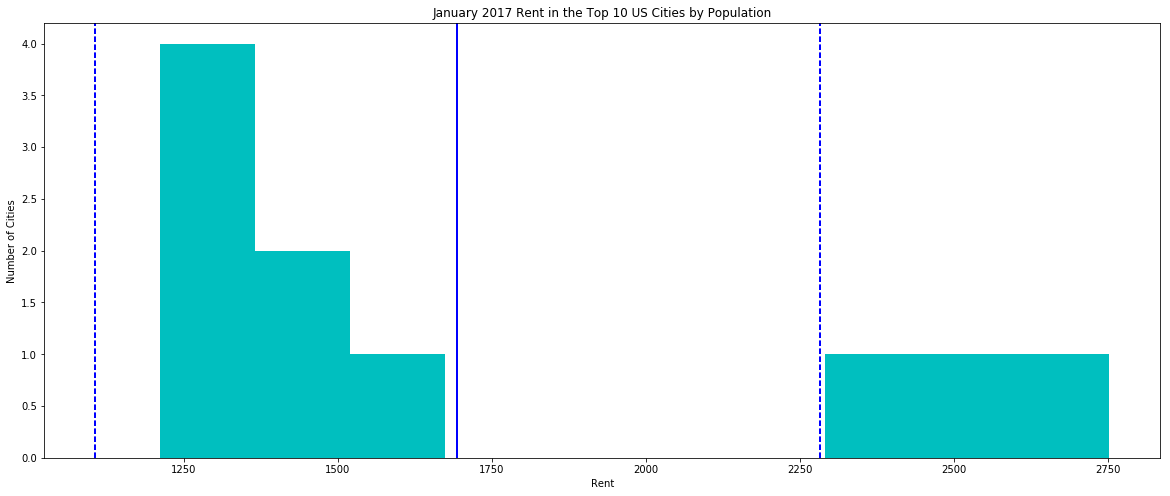

Mean:  1694.5
Standard Deviation:  588.607631996


In [81]:
top_10_jan_rent = df.ix[:9, 'January 2017']
plt.figure(figsize = (20, 8))
plt.hist(top_10_jan_rent.values, color = 'c')
plt.axvline(top_10_jan_rent.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(top_10_jan_rent.mean() - top_10_jan_rent.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.axvline(top_10_jan_rent.mean() + top_10_jan_rent.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.ylabel("Number of Cities")
plt.xlabel("Rent")
plt.title("January 2017 Rent in the Top 10 US Cities by Population")
plt.show()

print("Mean: ", top_10_jan_rent.mean())
print("Standard Deviation: ", top_10_jan_rent.std())

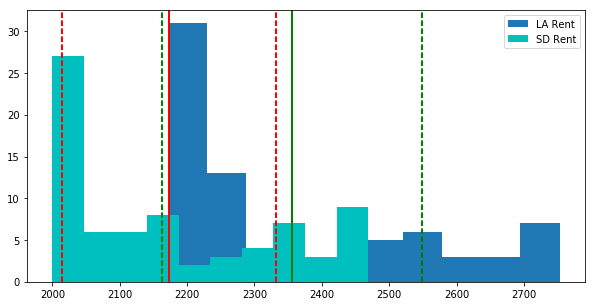

LA Mean:  2355.29333333
LA Standard Deviation:  193.210064461
None
SD Mean:  2172.84
SD Standard Deviation:  158.879355895


In [83]:
plt.figure(figsize=(10, 5))
plt.hist(LA_rent.values, label = 'LA Rent')
plt.axvline(LA_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(LA_rent.mean() + LA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(LA_rent.mean() - LA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(SD_rent.values, label = 'SD Rent', color = 'c')
plt.axvline(SD_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(SD_rent.mean() + SD_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(SD_rent.mean() - SD_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("LA Mean: ", LA_rent.mean())
print("LA Standard Deviation: ", LA_rent.std())
print(None)
print("SD Mean: ", SD_rent.mean())
print("SD Standard Deviation: ", SD_rent.std())

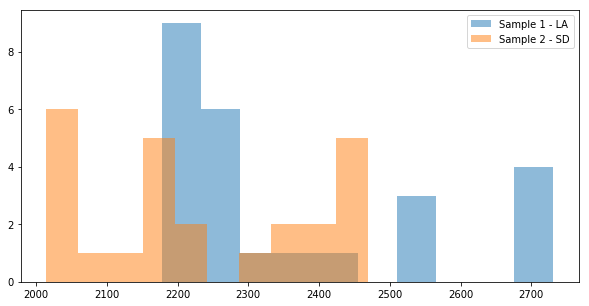

2358.76
2226.52
191.905243284
158.702771242
-132.24
-2.65513923377
Ttest_indResult(statistic=-2.601494527514232, pvalue=0.01241778458855608)


In [91]:
sample1 = np.random.choice(LA_rent, 25, replace = True)
sample2 = np.random.choice(SD_rent, 25, replace = True)

plt.figure(figsize=(10, 5))
plt.hist(sample1, alpha = 0.5, label = "Sample 1 - LA")
plt.hist(sample2, alpha = 0.5, label = "Sample 2 - SD")
plt.legend(loc='upper right')
plt.show()

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

diff=sample2.mean( ) -sample1.mean()
print(diff)

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
diff_se = sum(sd ** 2 / size) ** 0.5 
print(diff/diff_se)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

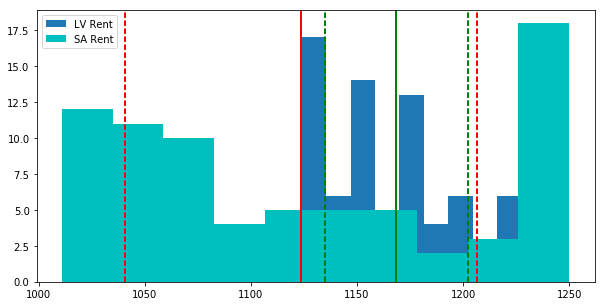

LV Mean:  1168.49333333
LV Standard Deviation:  33.7071543185
None
SA Mean:  1123.68
SA Standard Deviation:  82.7601810508


In [95]:
plt.figure(figsize=(10, 5))
plt.hist(LV_rent.values, label = 'LV Rent')
plt.axvline(LV_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(LV_rent.mean() + LV_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(LV_rent.mean() - LV_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(SA_rent.values, label = 'SA Rent', color = 'c')
plt.axvline(SA_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(SA_rent.mean() + SA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(SA_rent.mean() - SA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper left')
plt.show()
print("LV Mean: ", LV_rent.mean())
print("LV Standard Deviation: ", LV_rent.std())
print(None)
print("SA Mean: ", SA_rent.mean())
print("SA Standard Deviation: ", SA_rent.std())

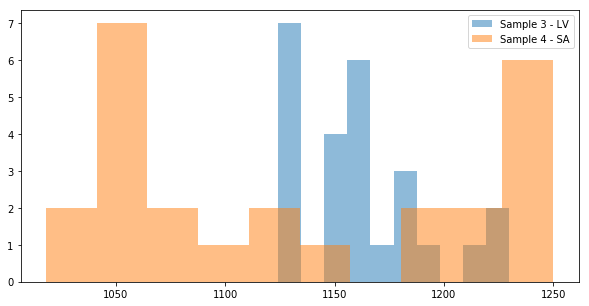

1161.56
1133.28
30.2073898243
81.5757414922
-28.28
-1.6254926766
Ttest_indResult(statistic=-1.5926510553155213, pvalue=0.12156427439122321)


In [88]:
sample3 = np.random.choice(LV_rent, 25, replace = True)
sample4 = np.random.choice(SA_rent, 25, replace = True)

plt.figure(figsize=(10, 5))
plt.hist(sample3, alpha = 0.5, label = "Sample 3 - LV")
plt.hist(sample4, alpha = 0.5, label = "Sample 4 - SA")
plt.legend(loc='upper right')
plt.show()

print(sample3.mean())
print(sample4.mean())
print(sample3.std())
print(sample4.std())

diff=sample4.mean( ) -sample3.mean()
print(diff)

size = np.array([len(sample3), len(sample4)])
sd = np.array([sample3.std(), sample4.std()])
diff_se = sum(sd ** 2 / size) ** 0.5 
print(diff/diff_se)

from scipy.stats import ttest_ind
print(ttest_ind(sample4, sample3, equal_var=False))

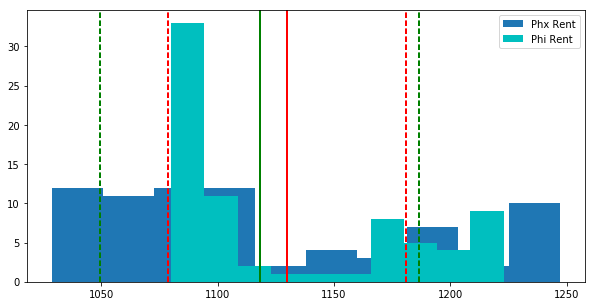

Phx Mean:  1118.04
Phx Standard Deviation:  68.7102101072
None
Phi Mean:  1129.98666667
Phi Standard Deviation:  51.1313870215


In [93]:
plt.figure(figsize=(10, 5))
plt.hist(Phx_rent.values, label = 'Phx Rent')
plt.axvline(Phx_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(Phx_rent.mean() + Phx_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(Phx_rent.mean() - Phx_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(Phi_rent.values, label = 'Phi Rent', color = 'c')
plt.axvline(Phi_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(Phi_rent.mean() + Phi_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(Phi_rent.mean() - Phi_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("Phx Mean: ", Phx_rent.mean())
print("Phx Standard Deviation: ", Phx_rent.std())
print(None)
print("Phi Mean: ", Phi_rent.mean())
print("Phi Standard Deviation: ", Phi_rent.std())

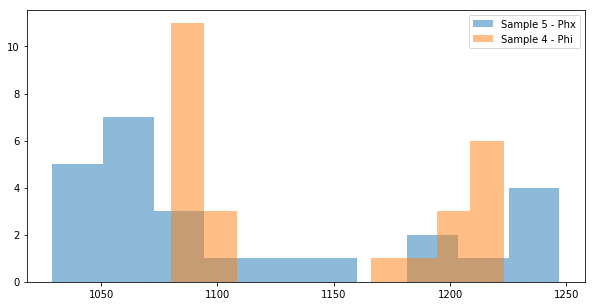

1112.16
1140.2
76.1323479212
60.2454977571
28.04
1.44408333997
Ttest_indResult(statistic=1.4149069315940694, pvalue=0.16389000004422588)


In [90]:
sample5 = np.random.choice(Phx_rent, 25, replace = True)
sample6 = np.random.choice(Phi_rent, 25, replace = True)

plt.figure(figsize=(10, 5))
plt.hist(sample5, alpha = 0.5, label = "Sample 5 - Phx")
plt.hist(sample6, alpha = 0.5, label = "Sample 4 - Phi")
plt.legend(loc='upper right')
plt.show()

print(sample5.mean())
print(sample6.mean())
print(sample5.std())
print(sample6.std())

diff=sample6.mean( ) -sample5.mean()
print(diff)

size = np.array([len(sample5), len(sample6)])
sd = np.array([sample5.std(), sample6.std()])
diff_se = sum(sd ** 2 / size) ** 0.5 
print(diff/diff_se)

from scipy.stats import ttest_ind
print(ttest_ind(sample6, sample5, equal_var=False))

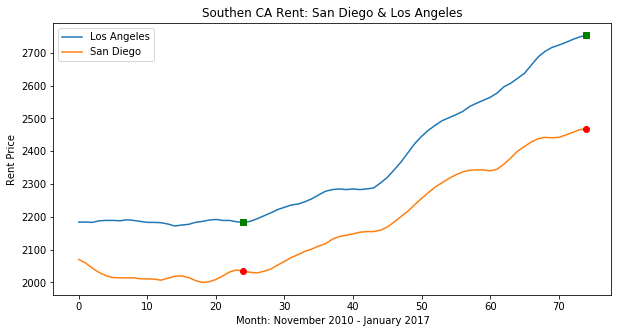

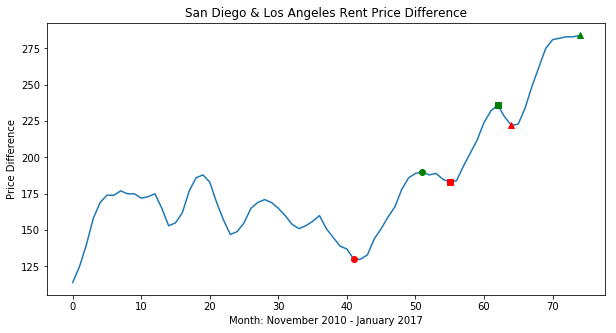

In [58]:
plt.figure(figsize = (10, 5))
plt.plot(LA_rent.values, label = 'Los Angeles')
plt.plot(SD_rent.values, label = 'San Diego')
plt.plot([24], [2034], 'ro') #Nov. 2012 in SD
plt.plot([24], [2183], 'gs') #Nov. 2012 in LA
plt.plot([74], [2469], 'ro') #Jan. 2017 in SD
plt.plot([74], [2753], 'gs') #Jan. 2017 in LA
plt.xlabel('Month: November 2010 - January 2017')
plt.ylabel('Rent Price')
plt.title('Southen CA Rent: San Diego & Los Angeles')
plt.legend(loc='upper left')
plt.show()

LA_SD_rent_diff = LA_rent.values - SD_rent.values
plt.figure(figsize = (10, 5))
plt.plot(LA_SD_rent_diff)
plt.plot([41], [130], 'ro') #Difference of $130 in April 2014 before the difference begins to increase
plt.plot([51], [190], 'go') #End of the first big increase in difference of rent price, Feb. 2015
plt.plot([55], [183], 'rs') #Diff. decreased to $183 in June 2015 before taking off again
plt.plot([62], [236], 'gs') #Next peak difference was Jan. 2016
plt.plot([64], [222], 'r^') #Price difference in Mar. 2016 before it began increasing to the present
plt.plot([74], [284], 'g^') #Difference is still increasing, as of Jan. 2017 it was $284
plt.xlabel('Month: November 2010 - January 2017')
plt.ylabel('Price Difference')
plt.title('San Diego & Los Angeles Rent Price Difference')
plt.show()



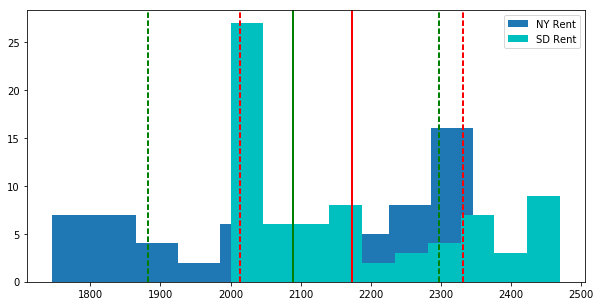

NY Mean:  2089.64516129
NY Standard Deviation:  207.087856288
None
SD Mean:  2172.84
SD Standard Deviation:  158.879355895


In [96]:
plt.figure(figsize=(10, 5))
plt.hist(NY_rent.values, label = 'NY Rent')
plt.axvline(NY_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(NY_rent.mean() + NY_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(NY_rent.mean() - NY_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(SD_rent.values, label = 'SD Rent', color = 'c')
plt.axvline(SD_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(SD_rent.mean() + SD_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(SD_rent.mean() - SD_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("NY Mean: ", NY_rent.mean())
print("NY Standard Deviation: ", NY_rent.std())
print(None)
print("SD Mean: ", SD_rent.mean())
print("SD Standard Deviation: ", SD_rent.std())

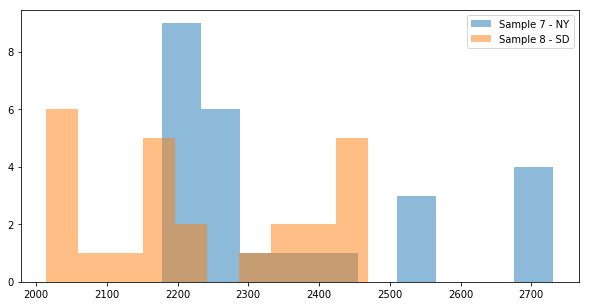

nan
2154.76
nan
166.762652893
nan
nan
Ttest_indResult(statistic=nan, pvalue=nan)


In [97]:
sample7 = np.random.choice(NY_rent, 25, replace = True)
sample8 = np.random.choice(SD_rent, 25, replace = True)

plt.figure(figsize=(10, 5))
plt.hist(sample1, alpha = 0.5, label = "Sample 7 - NY")
plt.hist(sample2, alpha = 0.5, label = "Sample 8 - SD")
plt.legend(loc='upper right')
plt.show()

print(sample7.mean())
print(sample8.mean())
print(sample7.std())
print(sample8.std())

diff=sample8.mean( ) -sample7.mean()
print(diff)

size = np.array([len(sample7), len(sample8)])
sd = np.array([sample7.std(), sample8.std()])
diff_se = sum(sd ** 2 / size) ** 0.5 
print(diff/diff_se)

from scipy.stats import ttest_ind
print(ttest_ind(sample8, sample7, equal_var=False))